In [1]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
sys.path.insert(0, os.path.abspath('..'))

In [3]:
from scale_rl.envs.mujoco import MUJOCO_ALL, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, HB_RANDOM_SCORE, HB_SUCCESS_SCORE
from scale_rl.envs.myosuite import MYOSUITE_TASKS
from scale_rl.common.wandb_utils import *

/home/leehojoon/.pyenv/versions/3.9.5/lib/python3.9/site-packages/wandb/analytics/sentry.py:90: SentryHubDeprecationWarning: `sentry_sdk.Hub` is deprecated and will be removed in a future major release. Please consult our 1.x to 2.x migration guide for details on how to migrate `Hub` usage to the new API: https://docs.sentry.io/platforms/python/migration/1.x-to-2.x
  self.hub = sentry_sdk.Hub(client)
/home/leehojoon/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Collect Results

In [4]:
tdmpc_eval_df = pd.read_csv(
    "../results/tdmpc2.csv",
    index_col=0
)
tdmpc_eval_df

,exp_name,env_name,seed,metric,env_step,value
82,td_mpcv2,acrobot-swingup,1,avg_return,0.0,7.6
83,td_mpcv2,acrobot-swingup,1,avg_return,100000.0,112.1
84,td_mpcv2,acrobot-swingup,1,avg_return,200000.0,219.4
85,td_mpcv2,acrobot-swingup,1,avg_return,300000.0,350.9
86,td_mpcv2,acrobot-swingup,1,avg_return,400000.0,283.2
...,...,...,...,...,...,...
11900,td_mpcv2,walker-walk-backwards,3,avg_return,3600000.0,980.3
11901,td_mpcv2,walker-walk-backwards,3,avg_return,3700000.0,978.1
11902,td_mpcv2,walker-walk-backwards,3,avg_return,3800000.0,984.8
11903,td_mpcv2,walker-walk-backwards,3,avg_return,3900000.0,986.1


In [5]:
simba_v1_eval_df = pd.read_csv(
    "../results/sac_simba.csv",
    index_col=0
)
simba_v1_eval_df

,exp_name,env_name,seed,metric,env_step,value
0,sac_simba,dog_trot,4000,avg_return,0.0,10.229937
1,sac_simba,dog_trot,4000,avg_return,50000.0,64.202362
2,sac_simba,dog_trot,4000,avg_return,100000.0,148.874287
3,sac_simba,dog_trot,4000,avg_return,150000.0,258.045214
4,sac_simba,dog_trot,4000,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
24485,sac_simba,humanoid_stand,500,avg_success,800000.0,0.000000
24486,sac_simba,humanoid_stand,500,avg_success,850000.0,0.000000
24487,sac_simba,humanoid_stand,500,avg_success,900000.0,0.000000
24488,sac_simba,humanoid_stand,500,avg_success,950000.0,0.000000


In [6]:
entity = 'draftrec'
project_name = 'HyperSimba_2412'
run_exp_names_to_analysis_exp_names = {
    'gmax5_lr1e4_5e5': 'gmax5_lr_decay_ema_target995',
    'gmax5_c101_target_copy250': 'gmax5_lr_decay_fixed_target250',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [7]:
runs = collect_runs(entity=entity, project_name=project_name) 
filtered_runs = filter_runs(runs, exp_names = run_exp_names)
wandb_df = convert_runs_to_dataframe(
    runs = filtered_runs, 
    run_exp_name_to_analysis_exp_name=run_exp_names_to_analysis_exp_names
)
wandb_df = wandb_df[wandb_df.apply(lambda row: 'finished' in str(row['run']), axis=1)]
gmax_eval_df = convert_wandb_df_to_eval_df(wandb_df, metrics)
gmax_eval_df

100%|██████████| 583/583 [04:45<00:00,  2.05it/s]


,exp_name,env_name,seed,metric,env_step,value
0,gmax5_lr_decay_fixed_target250,humanoid-run,5000,avg_return,0.0,1.011979
1,gmax5_lr_decay_fixed_target250,humanoid-run,5000,avg_return,100000.0,1.402642
2,gmax5_lr_decay_fixed_target250,humanoid-run,5000,avg_return,200000.0,1.242272
3,gmax5_lr_decay_fixed_target250,humanoid-run,5000,avg_return,300000.0,3.487733
4,gmax5_lr_decay_fixed_target250,humanoid-run,5000,avg_return,400000.0,97.330088
...,...,...,...,...,...,...
13921,gmax5_lr_decay_ema_target995,acrobot-swingup,0,avg_success,600000.0,0.000000
13922,gmax5_lr_decay_ema_target995,acrobot-swingup,0,avg_success,700000.0,0.000000
13923,gmax5_lr_decay_ema_target995,acrobot-swingup,0,avg_success,800000.0,0.000000
13924,gmax5_lr_decay_ema_target995,acrobot-swingup,0,avg_success,900000.0,0.000000


In [8]:
eval_df = pd.concat([simba_v1_eval_df, tdmpc_eval_df, gmax_eval_df])

In [9]:
exp_names = eval_df['exp_name'].unique()
exp_names

array(['sac_simba', 'td_mpcv2', 'gmax5_lr_decay_fixed_target250',
       'gmax5_lr_decay_ema_target995'], dtype=object)

#### Visualize Results

In [10]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [11]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)
eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,sac_simba,dog_trot,4000,avg_return,0.0,10.229937
1,sac_simba,dog_trot,4000,avg_return,50000.0,64.202362
2,sac_simba,dog_trot,4000,avg_return,100000.0,148.874287
3,sac_simba,dog_trot,4000,avg_return,150000.0,258.045214
4,sac_simba,dog_trot,4000,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
13921,gmax5_lr_decay_ema_target995,acrobot_swingup,0,avg_success,600000.0,0.000000
13922,gmax5_lr_decay_ema_target995,acrobot_swingup,0,avg_success,700000.0,0.000000
13923,gmax5_lr_decay_ema_target995,acrobot_swingup,0,avg_success,800000.0,0.000000
13924,gmax5_lr_decay_ema_target995,acrobot_swingup,0,avg_success,900000.0,0.000000


In [12]:
MUJOCO_RANDOM_SCORE = {key.replace('-', '_'): value for key, value in MUJOCO_RANDOM_SCORE.items()}
MUJOCO_TD3_SCORE = {key.replace('-', '_'): value for key, value in MUJOCO_TD3_SCORE.items()}
HB_RANDOM_SCORE = {key.replace('-', '_'): value for key, value in HB_RANDOM_SCORE.items()}
HB_SUCCESS_SCORE = {key.replace('-', '_'): value for key, value in HB_SUCCESS_SCORE.items()}

In [61]:
cur_exp_names = ['sac_simba', 'td_mpcv2', 'gmax5_lr_decay_fixed_target250']
#cur_exp_names = ['gmax5_lr_decay_ema_target995', 'gmax5_lr_decay_fixed_target250']
#cur_exp_names = ['gmax5_lr_decay_fixed_target250']

#eval_df['exp_name'].unique()

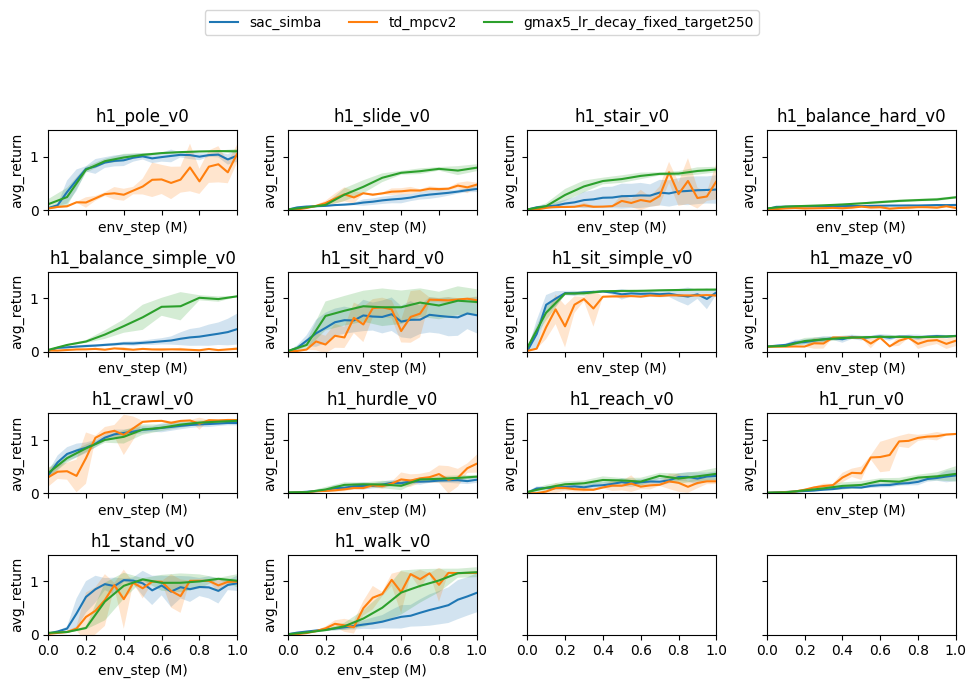

In [62]:
metric_matrix_dict = None

for env_type in ['HB_LOCOMOTION_NOHAND']:
    if env_type == 'MUJOCO_ALL':
        env_list = MUJOCO_ALL
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4
        y_lim_max=2.2

    elif env_type == 'DMC_EM':
        env_list = DMC_EM
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=8 # 4
        y_lim_max=1.1

    elif env_type == 'DMC_HARD':
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 2.5
        y_lim_max=1.1

    elif env_type == 'MYOSUITE':
        env_list = MYOSUITE_TASKS
        env_step = 1e6
        metric_type = 'avg_success'
        plot_height=6 # 2.5
        y_lim_max=1.1

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        env_list = HB_LOCOMOTION_NOHAND
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=1.5

    _eval_df = eval_df[eval_df['env_name'].isin(env_list)]
    _eval_df = _eval_df[_eval_df['exp_name'].isin(cur_exp_names)]

    if env_type in ['MUJOCO_ALL']:
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            MUJOCO_RANDOM_SCORE, 
            MUJOCO_TD3_SCORE
        )

    elif env_type in ['DMC_EM', 'DMC_HARD']:
        _eval_df.loc[:, 'value'] /= 1000.0

    elif env_type in ['HB_LOCOMOTION_NOHAND']:
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            HB_RANDOM_SCORE, 
            HB_SUCCESS_SCORE
        )

    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, 
        env_step=env_step,
        metric_type=metric_type,
    )

    if metric_matrix_dict is None:
        metric_matrix_dict = _metric_matrix_dict
    else:
        for key, arr2 in _metric_matrix_dict.items(): 
            if key in metric_matrix_dict: 
                arr1 = metric_matrix_dict[key] 
                min_cols = min(arr1.shape[1], arr2.shape[1]) 
                metric_matrix_dict[key] = np.concatenate( 
                    (arr1[:, :min_cols], arr2[:, :min_cols]), axis=0 
                ) 
            else: 
                metric_matrix_dict[key] = arr2.copy()

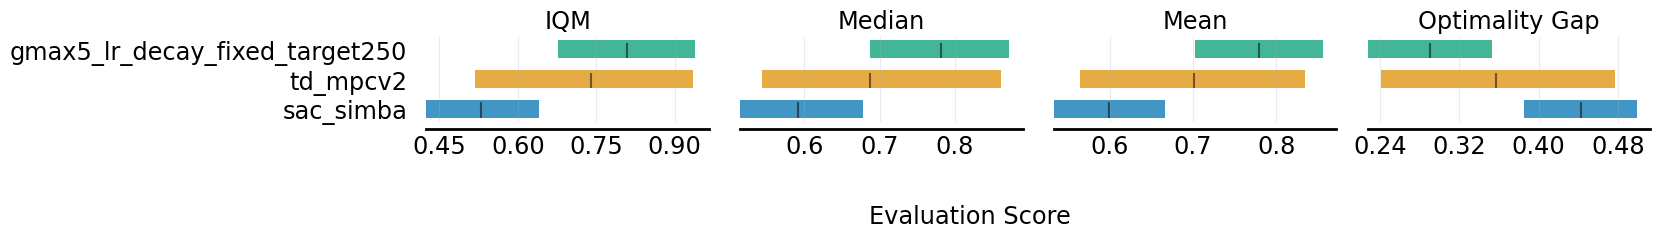

In [63]:
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
    metric_matrix_dict, aggregate_func, reps=10000)

fig, axes = rly_plot_utils.plot_interval_estimates(
    aggregate_scores, aggregate_score_cis,
    metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
    algorithms=cur_exp_names,
    xlabel_y_coordinate=-0.8,
    xlabel='Evaluation Score',
)

In [64]:
aggregate_scores

{'sac_simba': array([0.52991465, 0.59109335, 0.59925685, 0.44254722]),
 'td_mpcv2': array([0.74035162, 0.68711983, 0.70147224, 0.35680721]),
 'gmax5_lr_decay_fixed_target250': array([0.80918663, 0.78175471, 0.77929285, 0.29016294])}

In [65]:
for method ,value in aggregate_score_cis.items():
    err = value[1][2] - aggregate_scores[method][2]
    print(method, err)

sac_simba 0.06667945580447887
td_mpcv2 0.13328962464337968
gmax5_lr_decay_fixed_target250 0.07703856262888986


In [66]:
for key, value in metric_matrix_dict.items():
    print(key, value.shape)

sac_simba (14, 10)
td_mpcv2 (14, 3)
gmax5_lr_decay_fixed_target250 (14, 7)
